# Clustering Project

## 1. Data Prep

In [390]:
import pandas as pd 

In [391]:
# a. Read in the data file wholesale_clients.csv

data = pd.read_csv("../Data/wholesale_clients.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [392]:
# b. Remove the Channel and Region columns since they are not fields we want to model on

data = data.iloc[:,2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [393]:
data_backup = data.copy()

In [394]:
# c. Note the number of rows and columns
data.shape

(440, 6)

In [395]:
# d. Standardize the data

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [396]:
# e. Double check that all the column means are 0 and standard deviations are 1
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## 2. K-Means Clustering

In [398]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

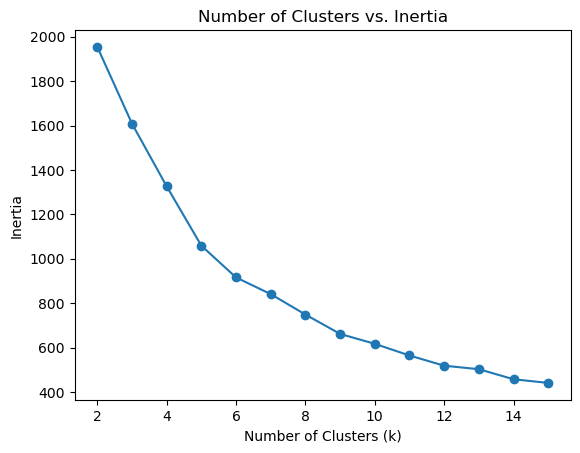

In [399]:
# b. Create an inertia plot
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

#### elbow = 4 or 5 

In [401]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters

kmeans5 = KMeans(n_clusters = 5, n_init ='auto', random_state= 42)
kmeans5.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [402]:
# d. Find the number of clients in each cluster
from collections import Counter
Counter(kmeans5.labels_)

Counter({3: 272, 0: 96, 1: 59, 2: 11, 4: 2})

In [403]:
import seaborn as sns

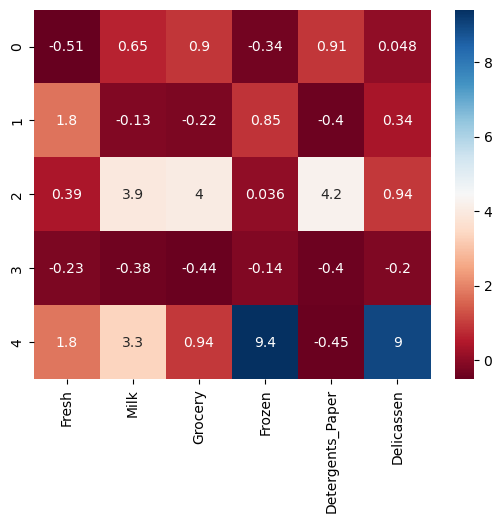

In [404]:
# e. Create a heat map of the cluster centers

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

### f. Name the clusters

* Cluster 0: **More Milk, Grocery and Paper Items**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More of Everything**
* Cluster 3: **Little of Everything**
* Cluster 4: **Lots of Frozen + Deli Items**

In [406]:
# g. Extra credit: create a silhouette scores plot instead of an inertia plot

from sklearn.metrics import silhouette_score

# create an empty list to hold many silhouette score values
silhouette_scores = []

# create 2 - 15 clusters, and add the silhouette scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

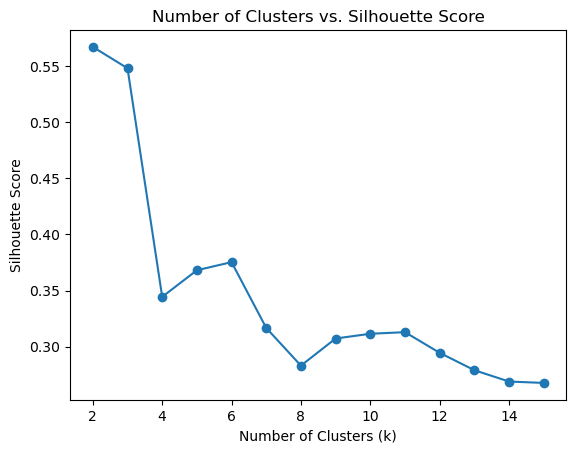

In [407]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

In [408]:
# h. fit two models with the number of clusters for the two highest silhouette scores and name the clusters

kmeans2 = KMeans(n_clusters = 2, n_init ='auto', random_state= 42)
kmeans2.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [409]:
Counter(kmeans2.labels_)

Counter({0: 373, 1: 67})

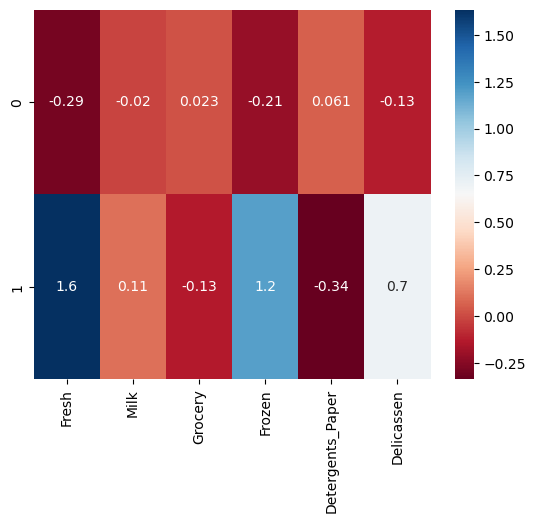

In [410]:
cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True);

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh, Frozen and Deli Items**

In [412]:
kmeans3 = KMeans(n_clusters = 3, n_init ='auto', random_state= 42)
kmeans3.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [413]:
Counter(kmeans3.labels_)

Counter({0: 350, 1: 53, 2: 37})

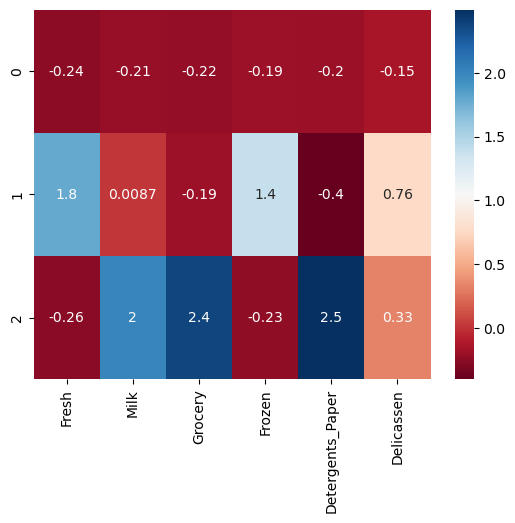

In [414]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh, Frozen and Deli Items**
* Cluster 2: **More Milk, Grocery and Paper Items**

## 3. Hierarchical Clustering

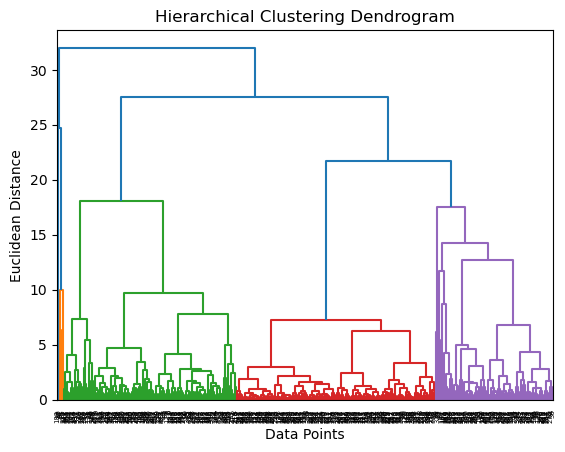

In [417]:
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [418]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster

from sklearn.cluster import AgglomerativeClustering

agg5 = AgglomerativeClustering(5)
agg5.fit(data_scaled)


AgglomerativeClustering(n_clusters=5)

In [419]:
Counter(agg5.labels_)

Counter({4: 177, 0: 153, 2: 104, 1: 5, 3: 1})

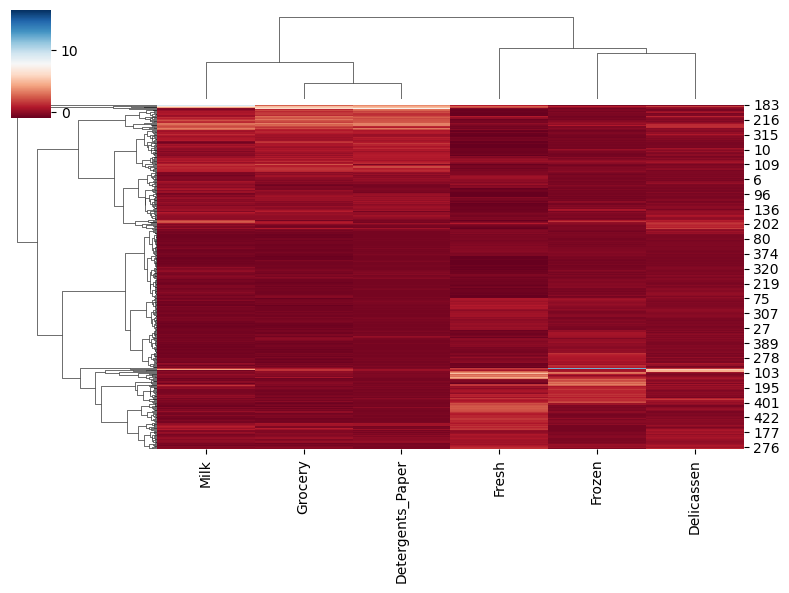

In [420]:
# d. Create a cluster map of the model you just fit
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

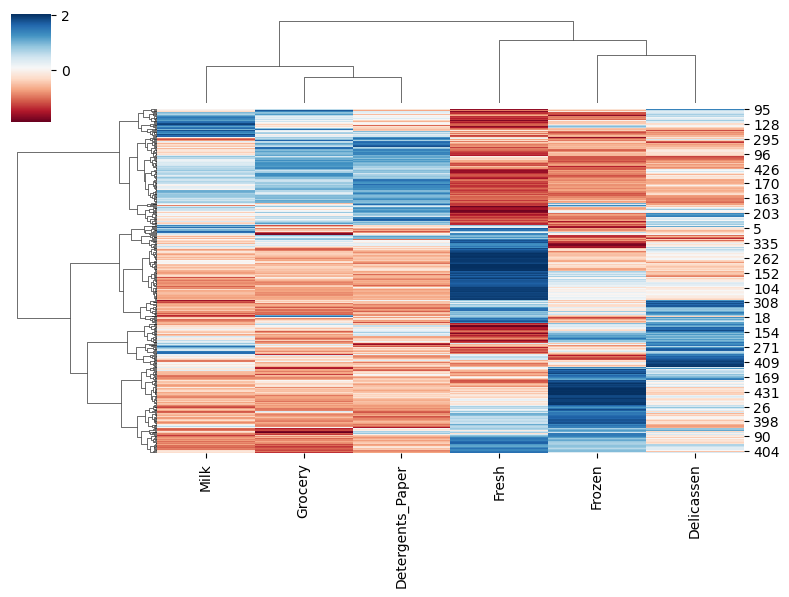

In [421]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns , z_score = 0)
plt.show()

In [422]:
# update scaled dataframe so that each row has a mean of 0 and standard deviation of 1

# calculate mean and standard deviation for each row
row_means = data_scaled.mean(axis=1)
row_stds = data_scaled.std(axis=1)

# divide each element in the row by the standard deviation
data_zscore = data_scaled.sub(row_means, axis=0).div(row_stds, axis=0)
data_zscore.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.226470,1.554663,-0.038946,-1.586185,-0.045871,-0.110132
1,-1.285281,1.515302,0.395561,-0.922651,0.144427,0.152640
2,-0.838979,0.048198,-0.404631,-0.518050,-0.237279,1.950740
3,0.417555,-1.050725,-0.582252,1.607848,-0.796394,0.403969
4,0.846251,-0.619745,-0.664022,-0.248161,-0.914577,1.600254


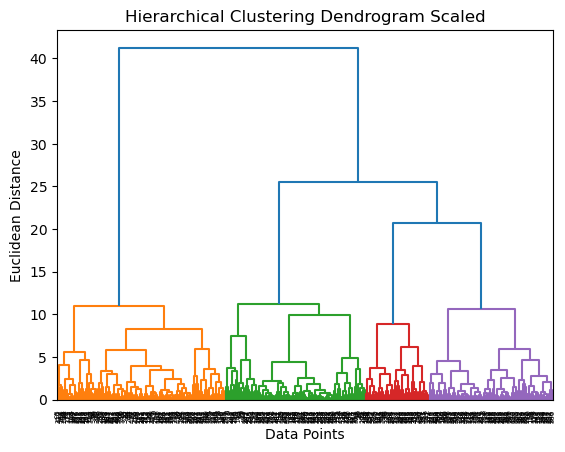

In [423]:
# update the dendrogram
linkage_matrix_zscore = linkage(data_zscore, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix_zscore, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram Scaled")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

### Retrieving and Reordering Cluster Labels from Hierarchical Clustering

#### DATA POINTS FOR THE FIRST DENDROGRAM 

In [426]:
data_points = pd.Series(dendrogram_info['ivl'], name='Data Point').astype('int')
data_points.head()

0    183
1     86
2     47
3     61
4     85
Name: Data Point, dtype: int64

#### New Dendrogram

In [428]:
data_points_zscore = pd.Series(dendrogram_info_zscore['ivl'], name='Data Point').astype('int')
data_points_zscore.head()

0     95
1    317
2    430
3    184
4    266
Name: Data Point, dtype: int64

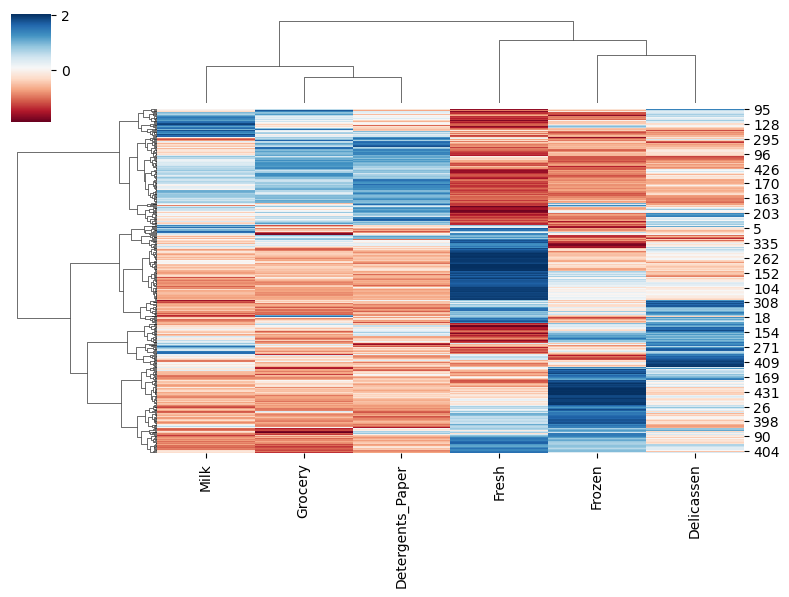

In [429]:
# cluster map 1: data scaled and z_score = 0
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns, z_score=0)
plt.show()

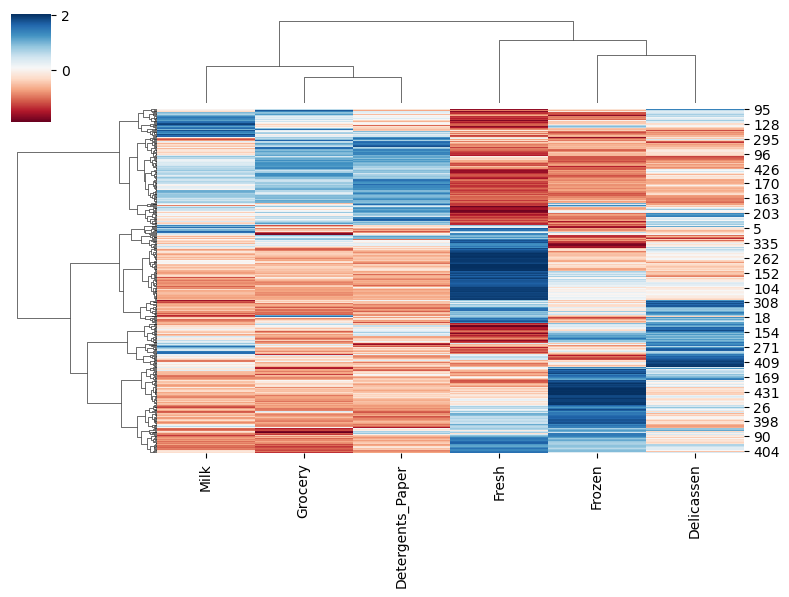

In [430]:
# cluster map 2: data_zscore without z_score parameter
sns.clustermap(data_zscore, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

* Cluster A: **Less Fresh Items**
* Cluster B: **More Fresh Items**
* Cluster C: **More Deli Items**
* Cluster D: **More Frozen Items**

In [432]:
agg4_zscore = AgglomerativeClustering(4)
agg4_zscore.fit(data_zscore)

AgglomerativeClustering(n_clusters=4)

In [433]:
Counter(agg4_zscore.labels_)

Counter({1: 149, 0: 125, 2: 110, 3: 56})

In [434]:
# f.to view the silhouette score for 2 to 20 clusters
agg_silhouette_scores = {}

for n in range(2, 21):
    agg_n = AgglomerativeClustering(n)
    agg_n.fit(data_scaled)
    agg_ss = silhouette_score(data_scaled, agg_n.labels_, metric='euclidean', sample_size=None)
    agg_silhouette_scores[n] = agg_ss

agg_silhouette_scores

{2: 0.7924572758342273,
 3: 0.2646091480214908,
 4: 0.2670148241989557,
 5: 0.23988371669170097,
 6: 0.23424990872738188,
 7: 0.2440568646459785,
 8: 0.25203846873433405,
 9: 0.27202620570114383,
 10: 0.27954261064916225,
 11: 0.28015398902140587,
 12: 0.24562381160303043,
 13: 0.24647695283235932,
 14: 0.22903049767293357,
 15: 0.23084079371143718,
 16: 0.18896719179943278,
 17: 0.19599492818636077,
 18: 0.19549508899836085,
 19: 0.20219343087967662,
 20: 0.20160566549699505}

In [435]:
agg2 = AgglomerativeClustering(2)
agg2.fit(data_scaled)

AgglomerativeClustering()

In [436]:
Counter(agg2.labels_)

Counter({0: 434, 1: 6})

## 4. DBSCAN

In [438]:
# a. to tune_dbscan function 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results


In [439]:
# b. Apply the dbscan function on the scaled data
dbscan_results = tune_dbscan(data_scaled)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [440]:
# c. Sort the data by highest silhouette score

dbscan_results.sort_values('Silhouette Score' , ascending = False ).groupby('Silhouette Score').head(1).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
97,1.3,3,3,25,0.424572
105,1.4,3,3,23,0.423547
113,1.5,3,3,21,0.421271


In [441]:
# d. Notice that the top eps value is close to 2, so update the function to test eps values up to 5 (instead of 2)
def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    # updated to 5 , to get a wider range of eps values 
    eps_values = np.arange(.1, 5, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [442]:
# e.applying the function again and view the top silhouette scores
dbscan_results2 = tune_dbscan(data_scaled)
dbscan_results2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [443]:
dbscan_results2.sort_values('Silhouette Score' , ascending = False ).groupby('Silhouette Score').head(1).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
224,2.9,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
232,3.0,2,3,8,0.577890


In [444]:
# fit DBSCAN model

dbscan_2 = DBSCAN(eps=3.5, min_samples=2)
dbscan_2.fit(data_scaled)

DBSCAN(eps=3.5, min_samples=2)

In [445]:
Counter(dbscan_2.labels_)

# 8 outliers 

Counter({0: 430, -1: 8, 1: 2})

## 5. Compare clusters

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 5 clusters
5. DBSCAN with 2 clusters

In [448]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print(silhouette_score(data, model.labels_))

In [449]:
print_metrics(kmeans3, data_scaled) 

KMeans(n_clusters=3, random_state=42)
Counter({0: 350, 1: 53, 2: 37})
0.4582633767207058


In [450]:
print_metrics(kmeans5, data_scaled) 

KMeans(n_clusters=5, random_state=42)
Counter({3: 272, 0: 96, 1: 59, 2: 11, 4: 2})
0.36890127429678055


In [451]:
print_metrics(agg2, data_scaled)   # very few differentiated points

AgglomerativeClustering()
Counter({0: 434, 1: 6})
0.7924572758342273


In [452]:
print_metrics(dbscan_2, data_scaled) 

DBSCAN(eps=3.5, min_samples=2)
Counter({0: 430, -1: 8, 1: 2})
0.740283564230615


In [453]:
print_metrics(agg4_zscore, data_zscore) # decent model

AgglomerativeClustering(n_clusters=4)
Counter({1: 149, 0: 125, 2: 110, 3: 56})
0.3427681898594439


## 6. Recommend Client Segments

In [455]:
# a. With the top model as the K-Means model with 3 clusters, review the results again

kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [456]:
Counter(kmeans3.labels_)

Counter({0: 350, 1: 53, 2: 37})

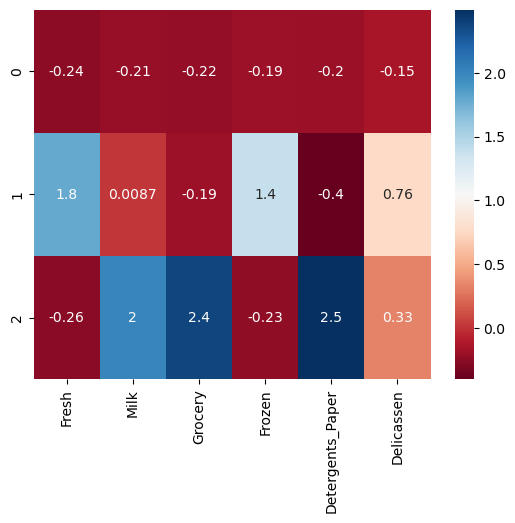

In [457]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More Milk, Grocery and Paper Items**

* **Typical clients**: make sure our sales team is knowledgeable about a variety of products
* **Clients who purchase a lot of fresh and frozen foods**: make sure to prioritize these clients when shipping them fresh foods
* **Clients who purchase a lot of milk, grocery, detergents and paper items**: make sure to keep them up to date on new non-perishable items

## 7. Predict the Cluster of a New Client

In [535]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [531]:
# a. Given this new client, determine which cluster they fall into
new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])], columns=data.columns)
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [533]:
# b. Scale the new client data using the same scaler object from the Data Prep step
new_client_scaled = pd.DataFrame(scaler.transform(new_client), columns=data.columns)
new_client_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [537]:
# c. Make a prediction using the K-Means model with 3 clusters
kmeans3.predict(new_client_scaled)

array([2], dtype=int32)

### The new client's purchasing profile belongs to Cluster 2 (Milk, Grocery and Paper Items).

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More Milk, Grocery and Paper Items**